<a href="https://colab.research.google.com/github/kyj0701/Round_Robin_Scheduler/blob/master/ganttchart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
myfile = files.upload()

Saving input.txt to input.txt


In [4]:
f = open(file='/content/input.txt')
line = f.readline()
num_process = 0
while line:
  process = line.split(' ')
  print(process[0],process[1],process[2])
  
  line = f.readline()
  num_process = num_process+1

print(num_process)

0 3 5

1 0 4

2 1 1

3 5 3

4 3 7

5 8 2

6


In [71]:
f2 = open(file='/content/input.txt')
line = f2.readline()
arr = [[0]*3 for _ in range(num_process)]
while line:
  for i in range(0,num_process):
    for j in range(0,3):
      process = line.split(' ')
      arr[i][j] = process[j].strip()
    line = f2.readline()

print(arr)

[['0', '3', '5'], ['1', '0', '4'], ['2', '1', '1'], ['3', '5', '3'], ['4', '3', '7'], ['5', '8', '2']]


In [72]:
w_time = 0
for k in range(0,num_process):
  w_time = w_time + int(arr[k][2])

print(w_time)


22


In [73]:
time_quantum = int(input('time_quantum : '))
print(time_quantum)

time_quantum : 3
3


[['0', '3', '5'], ['1', '0', '4'], ['2', '1', '1'], ['3', '5', '3'], ['4', '3', '7'], ['5', '8', '2']]
3
3
6
7
10
13
15
17
18
21
22
[[(0, 3), (15, 17)], [(3, 6), (17, 18)], [(6, 7)], [(7, 10)], [(10, 13), (18, 21), (21, 22)], [(13, 15)]]


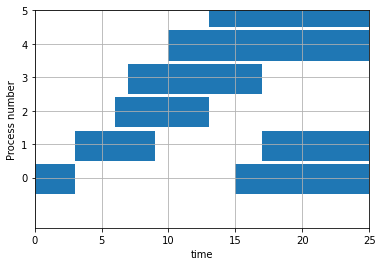

In [74]:

# Importing the matplotlb.pyplot
import matplotlib.pyplot as plt
  
# Declaring a figure "gnt"
fig, gnt = plt.subplots()
  
# Setting Y-axis limits
gnt.set_ylim(0, 10*num_process)
  
# Setting X-axis limits
gnt.set_xlim(0, w_time+time_quantum)
  
# Setting labels for x-axis and y-axis
gnt.set_xlabel('time')
gnt.set_ylabel('Process number')

num_arr = [0]*num_process  
for i in range(0,num_process):
  num_arr[i] = i

tick_arr = [0]*num_process
for j in range(0,num_process):
  tick_arr[j] = 15+10*j

# Setting ticks on y-axis
gnt.set_yticks(tick_arr)
# Labelling tickes of y-axis
gnt.set_yticklabels(num_arr)
  
# Setting graph attribute
gnt.grid(True)
#---------------------------------#
print(arr)
print(time_quantum)


arr_time = [[] for _ in range(num_process)]
i = 0

while i < w_time:
  for pn in range(0,num_process):
    
    if (int(arr[pn][2]) > time_quantum) :
      arr_time[pn].append((i,i+time_quantum))
      i = i + time_quantum
      arr[pn][2] = int(arr[pn][2]) - time_quantum
      print(i)

    elif (0< int(arr[pn][2]) <= time_quantum):
      arr_time[pn].append((i,i+int(arr[pn][2])) )
      i = i + int(arr[pn][2])
      arr[pn][2] = 0
      print(i)


    # else:
    #   break
      
    
    
      




      # arr_time[pn][i] = (time, time + int(arr[pn][2]))
# time = 0
#배열을 만들어야할듯

# while time < w_time:

#   for pn in range(0,num_process):
    
#     # for t in range(0,time_quantum):
#     if (int(arr[pn][2]) > time_quantum) :
#       arr_time[pn][i] = (time, time + time_quantum)
#       # print(time)
#       # gnt.broken_barh([(time, time+time_quantum)],(10+10*pn, 9))
#       time = time+time_quantum
#       arr[pn][2] = int(arr[pn][2]) - time_quantum
#       i = i + 1
#       # break
        
#       # for i in range(0,time_quantum):
        
        
#       # break

#     elif (int(arr[pn][2]) <= time_quantum):
#       arr_time[pn][i] = (time, time + int(arr[pn][2]))
#       # print(time)
#         # gnt.broken_barh([(time, time + int(arr[pn][2]))],(10+10*pn, 9))
#       time = time+int(arr[pn][2])
#       arr[pn][2] = 0
#       i = i + 1
#         # break
      # for j in range(0, int(arr[pn][2])):
        
       
      
      # break  

      # elif (arr[pn][2] == 0):
      #   break
      
print(arr_time)


for i in range(0,num_process):
  gnt.broken_barh(arr_time[i],(10+10*i, 9))
# # Declaring a bar in schedule
# gnt.broken_barh([(40, 50)], (30, 9), facecolors =('tab:orange'))
  
# # Declaring multiple bars in at same level and same width
# gnt.broken_barh([(110, 10), (150, 10)], (10, 9),
#                          facecolors ='tab:blue')
  
# gnt.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
#                                   facecolors =('tab:red'))
  
plt.savefig("gantt1.png")
